### Determining the long-term equilibrium for active projects and active staff.

Here we assume that:
* 20 new projects are created on each time step
* each project is assigned a random start time according to *timing_flexibility_vector*
* all projects run for 5 time steps
* team size is selected from the range [3,4,5,6,7] uniformly at random

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
number_new_projects = 20
#timing_flexibility_vector = [0.5,0.25,0.1,0.1,0.05]
timing_flexibility_vector = [1.0,0.,0.,0.,0.]
project_length = 5
total_timesteps = 1000
team_size_min_max = (3,7)

In [3]:
def choose_start_delay(vector=timing_flexibility_vector):
    
    x = np.random.uniform(0.0, 1.0)
    
    for i,e in enumerate(np.cumsum(vector[::-1])):
        if x < e:
            return len(vector)-(i+1)

In [4]:
class Project:
    
    def __init__(self, index, time, delay,
                 length=project_length,
                 team_size_limits=team_size_min_max):
        
        self.iindex = index
        
        self.created_at = time
        self.start = time + delay
        
        self.length = length
        self.status = 'pending' if time < self.start else 'active'
        
        self.team_size = np.random.randint(team_size_limits[0],
                                           team_size_limits[1]+1)
        
    def run(self, t):
        
        if t == self.start:
            self.status = 'active'
        
        if self.status == 'active':
            
            self.length -= 1
            if self.length == 0:
                self.status = 'ended'

In [5]:
project_counter = 0
all_projects = []

active_projects = []
active_staff = []

for t in range(total_timesteps):
    for p in range(number_new_projects):
        
        all_projects.append(
            Project(project_counter, t,
                    choose_start_delay(),
                    project_length))
        project_counter += 1
    
    project_count = sum([p.status == 'active' for p in all_projects])
    staff_count = sum([p.team_size for p in all_projects if p.status == 'active'])
    active_projects.append(project_count)
    active_staff.append(staff_count)
    #print(active_count)
    
    for p in all_projects:
        p.run(t)

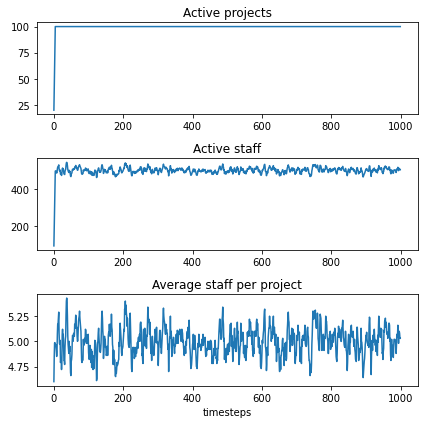

In [6]:
plt.figure(figsize=(6,6))
plt.subplot(3,1,1)
plt.plot(range(total_timesteps), active_projects)
plt.title('Active projects')
plt.subplot(3,1,2)
plt.plot(range(total_timesteps), active_staff)
plt.title('Active staff')
plt.subplot(3,1,3)
plt.plot(range(total_timesteps), np.array(active_staff)/np.array(active_projects))
plt.title('Average staff per project')
plt.xlabel('timesteps')

plt.tight_layout()

In [7]:
print(np.mean(ative_staff[200:]))

NameError: name 'ative_staff' is not defined